## Redes Neuronales - Trabajo Practico N°1 - Regresión Logística
### Physicochemical Properties of Protein Tertiary Structure Data Set 
es un dataset para construir un predictor del tamaño de residuos de proteínas en términos de características físico-químicas de las mismas (problema de regresión).

In [4]:
import pandas as pd
import src.functions as nn

In [5]:
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("data/CASP.csv", sep=',')

In [3]:
df

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41,35.6045


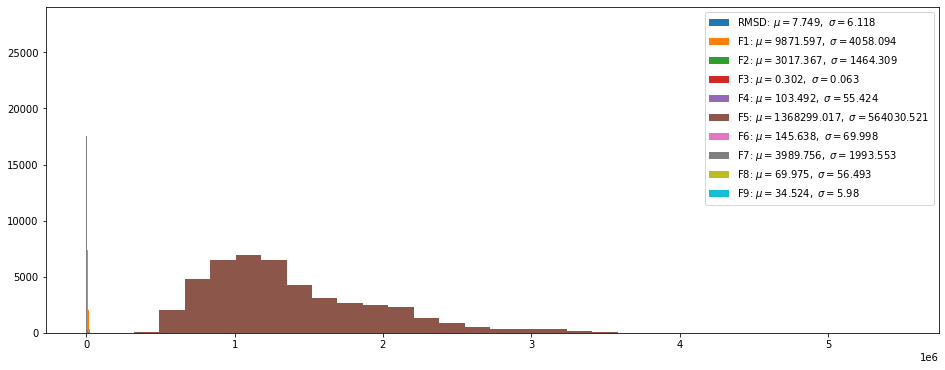

In [7]:
nn.pretty_hist(df,columns=df.keys(),bins=30)

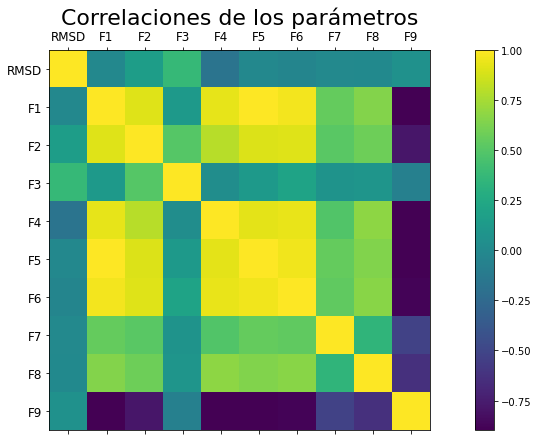

In [9]:
nn.pretty_corr_matrix(df,title="Correlaciones de los parámetros",figsize=(16,7))